In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from decomposer import Decomposer

from warnings import simplefilter
simplefilter('ignore')

In [2]:
df = pd.read_csv('gdp.csv', sep=';')
branches = ['Cp', 'Gp', 'Jp', 'Exp', 'Imp']

In [3]:
decomposer = Decomposer(df, branches, n_components=3)  # инициализировать модель
decomposer.fit(multistarts=10, reg=0.1)  # обучить модель с регуляризацией, сделать 10 мультистартов и выбрать лучший
decomposer.fit(multistarts=1, reg=0, x0=decomposer)  # обучить модель без регуляризации, инициализируя текущими значениями

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

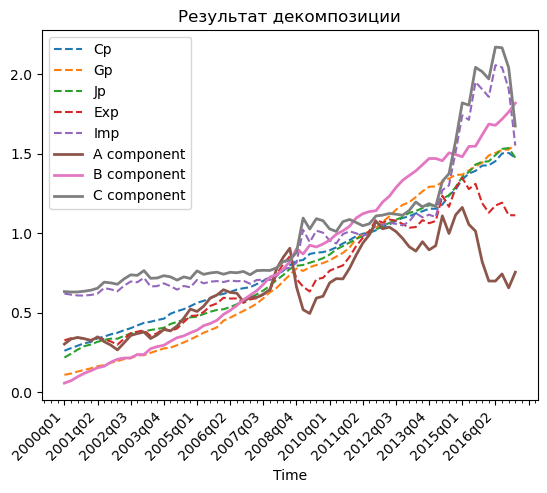

In [4]:
ax = df[branches].plot(linestyle='--')
sns.lineplot(x=df.t, y=decomposer.first_component,  label='A component',
             linewidth=2, ax=ax)
sns.lineplot(x=df.t, y=decomposer.second_component,  label='B component',
             linewidth=2, ax=ax)
if len(decomposer.components) > 2:
    sns.lineplot(x=df.t, y=decomposer.third_component,  label='C component',
                 linewidth=2, ax=ax)
ax.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax.xaxis.set_minor_formatter(mticker.NullFormatter())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Time")
plt.title("Результат декомпозиции"); 
ax.figure.savefig('components.png', dpi=250)  # раскомментируйте, если хотите сохранить картинку

In [5]:
"""Вывод результатов разложения (alpha, rho)"""
decomposer.summary('ces').round(4)

,Cp,Gp,Jp,Exp,Imp
alpha_0,0.2535,0.0288,0.1820,0.5712,0.0000
alpha_1,0.4211,0.9392,0.5658,0.2909,0.0000
alpha_2,0.3254,0.0320,0.2522,0.1379,1.0000
rho,5.3247,7.0640,6.6054,4.7867,6.1919


In [6]:
"""Вывод метрик"""
decomposer.summary('errors').round(4)

,Cp,Gp,Jp,Exp,Imp
MSE,0.0014,0.0003,0.0003,0.0004,0.0002
MAPE,0.0483,0.0285,0.0196,0.0247,0.0113
MAE,0.0314,0.0133,0.0121,0.0153,0.0099


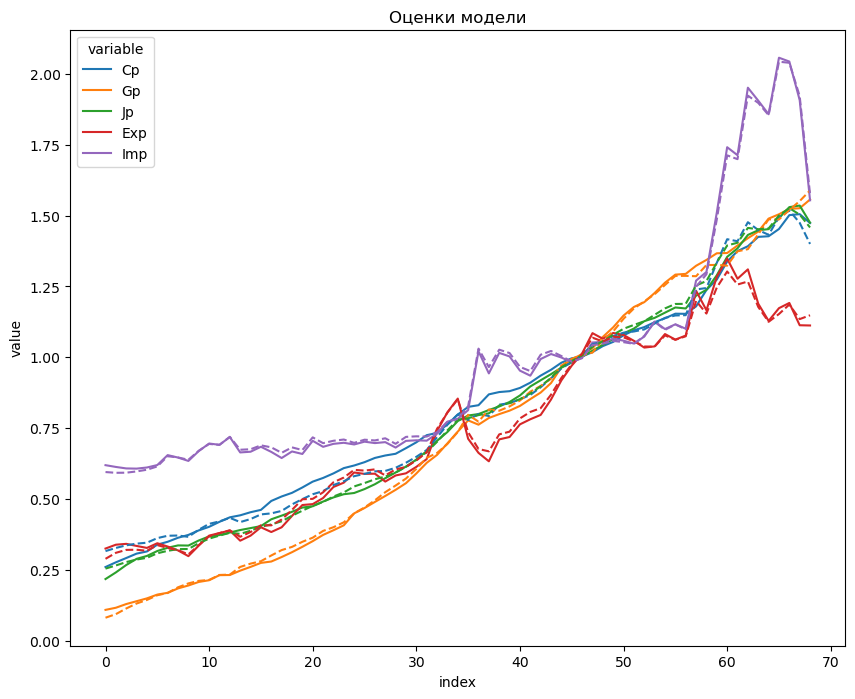

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(pd.melt(decomposer.targets.reset_index(), id_vars='index'), x='index', y='value', hue='variable')
sns.lineplot(pd.melt(decomposer.predictions.reset_index(), id_vars='index'),
             x='index', y='value', hue='variable', linestyle='--', legend=False)
plt.title("Оценки модели")
ax.figure.savefig('preds.png', dpi=250)  # раскомментируйте, если хотите сохранить картинку